In [1]:
import librosa.display
import librosa
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.signal import medfilt

In [3]:
path = '/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/'

In [4]:
#path_pieces = '../vocaldetection/vocal_pieces.json'
SPLITS = 'split_train_test_10.json'

In [5]:
train_files = []
test_files = []
with open(SPLITS) as json_file:  
    data = json.load(json_file)
#print (data)
    for spl in range(len(data)):
        train_files.append([])
        test_files.append([])
        # Load train data
        for music in data[spl]['train']:
            train_files[spl].append(music)
        #    print (music)

        # Load test data
        #print ('Test data')
        for music in data[spl]['test']:
            test_files[spl].append(music)

AClassicEducation_NightOwl
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AClassicEducation_NightOwl_MIX/vocals.wav
22050


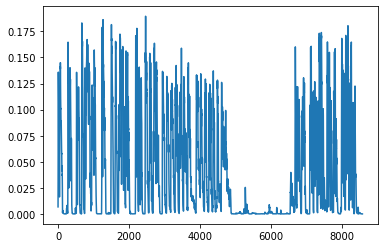

AimeeNorwich_Child
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AimeeNorwich_Child_MIX/vocals.wav
22050


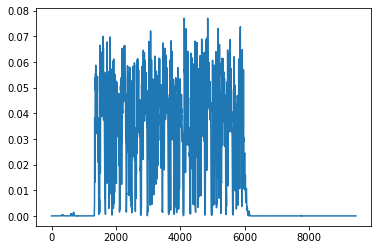

AlexanderRoss_GoodbyeBolero
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_GoodbyeBolero_MIX/vocals.wav
22050


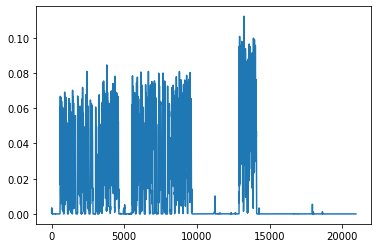

AlexanderRoss_VelvetCurtain
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_VelvetCurtain_MIX/vocals.wav
22050


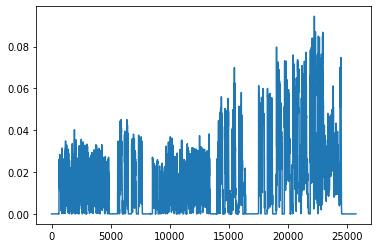

Auctioneer_OurFutureFaces
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Auctioneer_OurFutureFaces_MIX/vocals.wav
22050


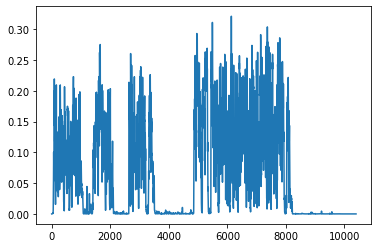

BigTroubles_Phantom
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BigTroubles_Phantom_MIX/vocals.wav
22050


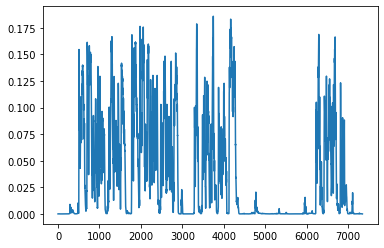

BrandonWebster_DontHearAThing
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebster_DontHearAThing_MIX/vocals.wav
22050


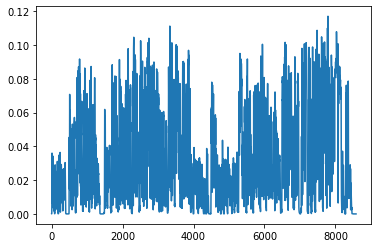

BrandonWebster_YesSirICanFly
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebster_YesSirICanFly_MIX/vocals.wav
22050


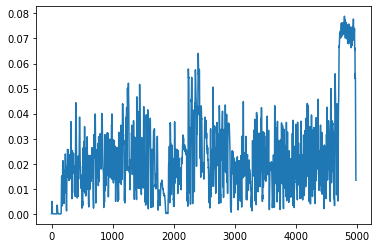

ClaraBerryAndWooldog_AirTraffic
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_AirTraffic_MIX/vocals.wav
22050


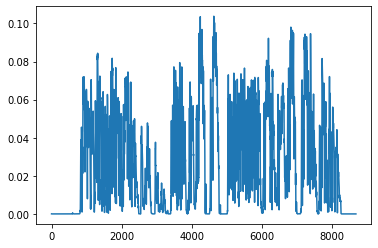

ClaraBerryAndWooldog_Boys
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_Boys_MIX/vocals.wav
22050


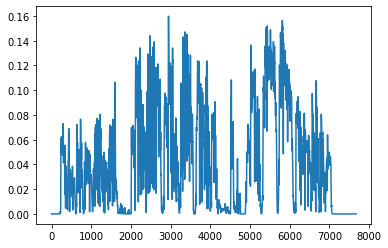

ClaraBerryAndWooldog_Stella
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_Stella_MIX/vocals.wav
22050


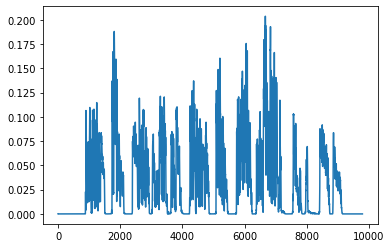

ClaraBerryAndWooldog_TheBadGuys
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_TheBadGuys_MIX/vocals.wav
22050


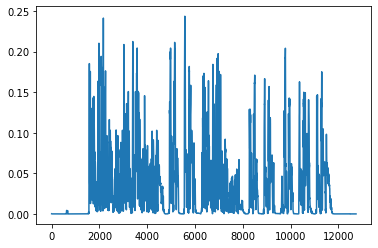

ClaraBerryAndWooldog_WaltzForMyVictims
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_WaltzForMyVictims_MIX/vocals.wav
22050


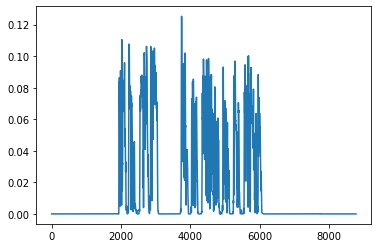

Debussy_LenfantProdigue
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Debussy_LenfantProdigue_MIX/vocals.wav
22050


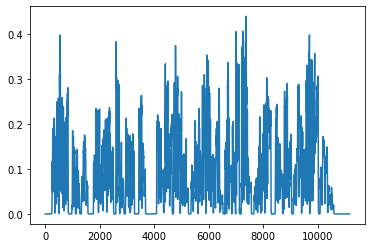

DreamersOfTheGhetto_HeavyLove
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/DreamersOfTheGhetto_HeavyLove_MIX/vocals.wav
22050


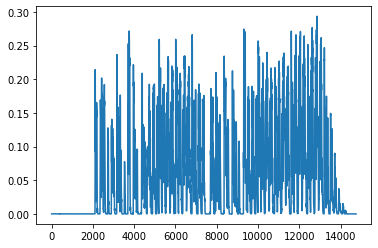

FacesOnFilm_WaitingForGa
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/FacesOnFilm_WaitingForGa_MIX/vocals.wav
22050


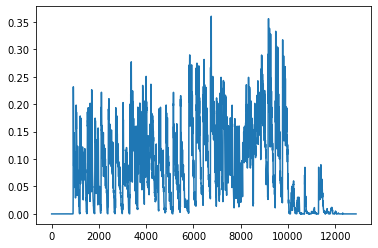

FamilyBand_Again
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/FamilyBand_Again_MIX/vocals.wav
22050


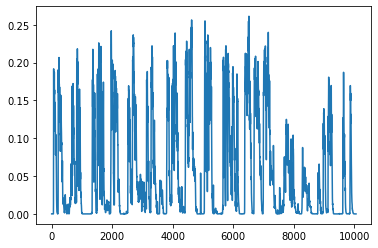

HeladoNegro_MitadDelMundo
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HeladoNegro_MitadDelMundo_MIX/vocals.wav
22050


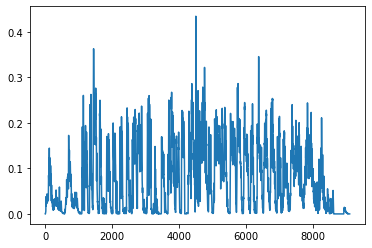

HezekiahJones_BorrowedHeart
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HezekiahJones_BorrowedHeart_MIX/vocals.wav
22050


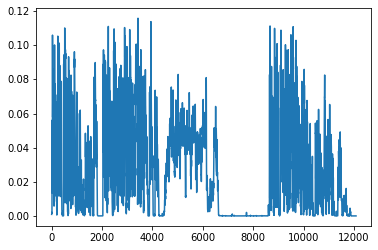

InvisibleFamiliars_DisturbingWildlife
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/InvisibleFamiliars_DisturbingWildlife_MIX/vocals.wav
22050


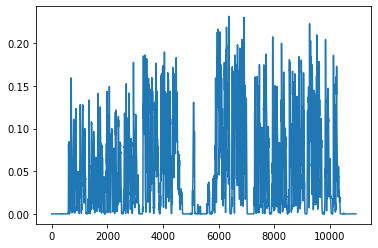

LizNelson_Coldwar
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_Coldwar_MIX/vocals.wav
22050


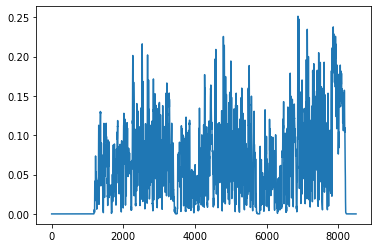

LizNelson_ImComingHome
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_ImComingHome_MIX/vocals.wav
22050


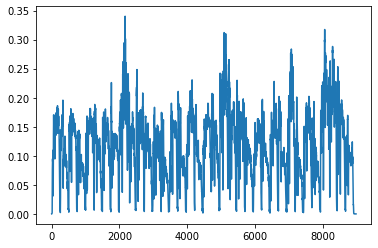

LizNelson_Rainfall
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_Rainfall_MIX/vocals.wav
22050


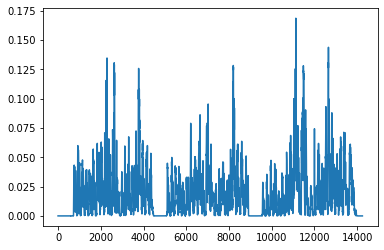

MatthewEntwistle_DontYouEver
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MatthewEntwistle_DontYouEver_MIX/vocals.wav
22050


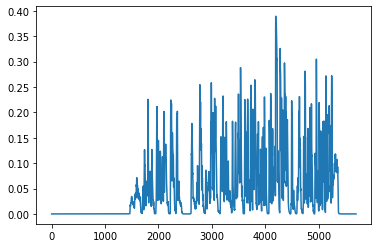

MatthewEntwistle_Lontano
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MatthewEntwistle_Lontano_MIX/vocals.wav
22050


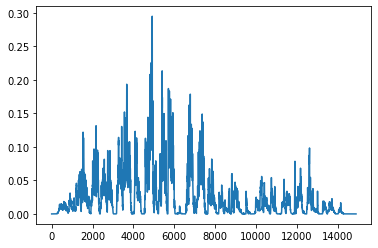

Meaxic_TakeAStep
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Meaxic_TakeAStep_MIX/vocals.wav
22050


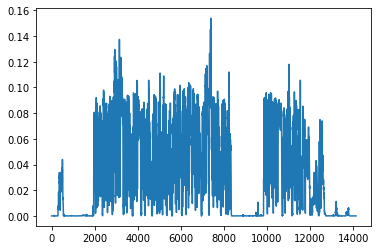

Meaxic_YouListen
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Meaxic_YouListen_MIX/vocals.wav
22050


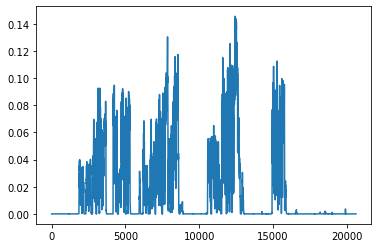

Mozart_DiesBildnis
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Mozart_DiesBildnis_MIX/vocals.wav
22050


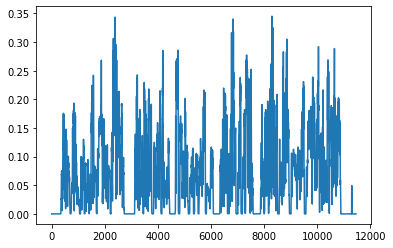

MusicDelta_80sRock
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_80sRock_MIX/vocals.wav
22050


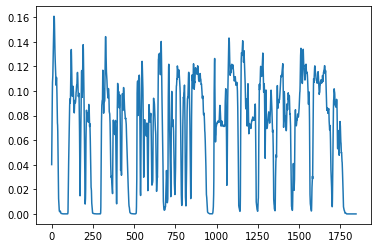

MusicDelta_Beatles
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Beatles_MIX/vocals.wav
22050


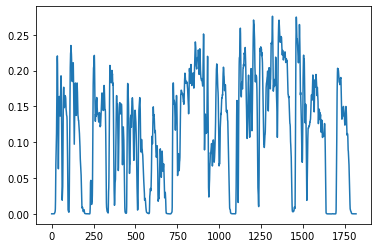

MusicDelta_Country1
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Country1_MIX/vocals.wav
22050


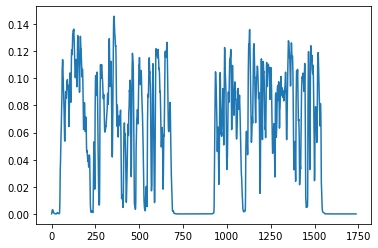

MusicDelta_Gospel
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Gospel_MIX/vocals.wav
22050


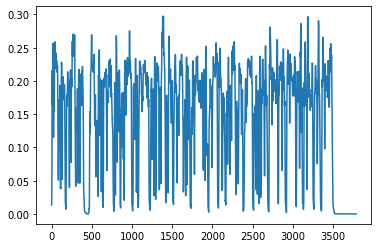

MusicDelta_Punk
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Punk_MIX/vocals.wav
22050


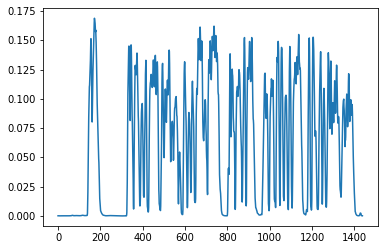

MusicDelta_Reggae
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Reggae_MIX/vocals.wav
22050


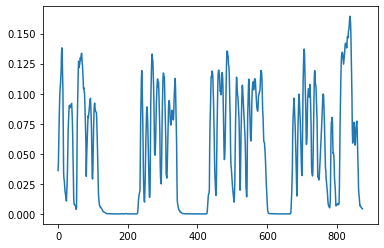

MusicDelta_Rockabilly
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Rockabilly_MIX/vocals.wav
22050


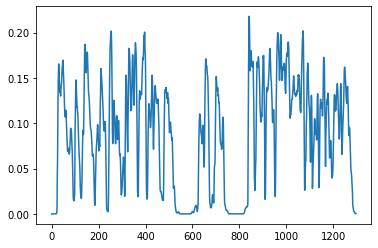

NightPanther_Fire
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/NightPanther_Fire_MIX/vocals.wav
22050


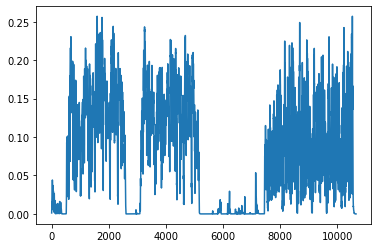

PortStWillow_StayEven
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/PortStWillow_StayEven_MIX/vocals.wav
22050


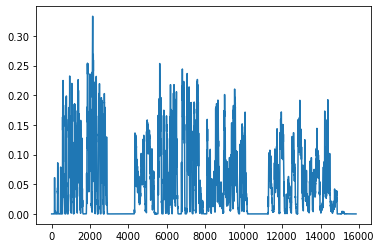

Schubert_Erstarrung
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Schubert_Erstarrung_MIX/vocals.wav
22050


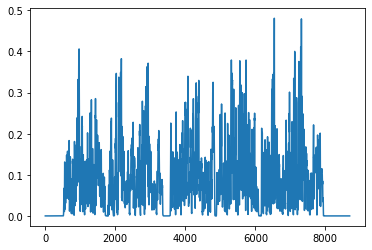

Snowmine_Curfews
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Snowmine_Curfews_MIX/vocals.wav
22050


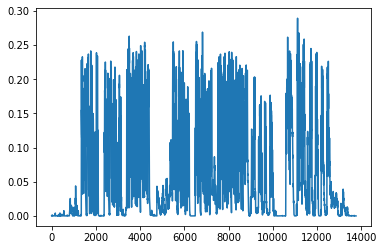

StevenClark_Bounty
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/StevenClark_Bounty_MIX/vocals.wav
22050


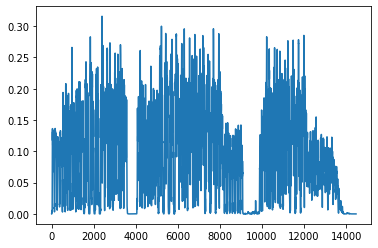

SweetLights_YouLetMeDown
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/SweetLights_YouLetMeDown_MIX/vocals.wav
22050


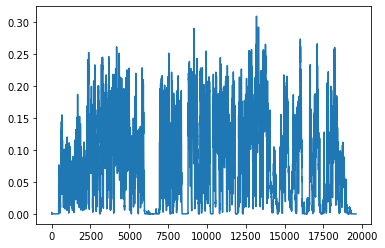

TheScarletBrand_LesFleursDuMal
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheScarletBrand_LesFleursDuMal_MIX/vocals.wav
22050


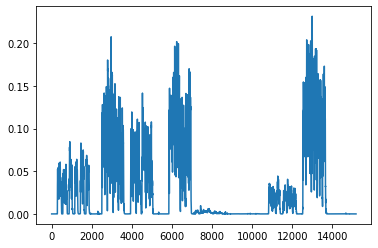

TheSoSoGlos_Emergency
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheSoSoGlos_Emergency_MIX/vocals.wav
22050


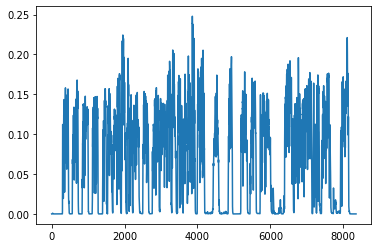

AvaLuna_Waterduct
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AvaLuna_Waterduct_MIX/vocals.wav
22050


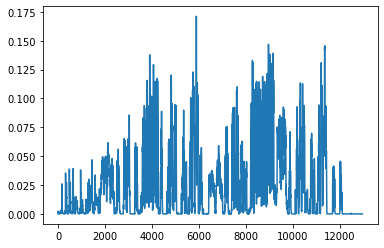

CelestialShore_DieForUs
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/CelestialShore_DieForUs_MIX/vocals.wav
22050


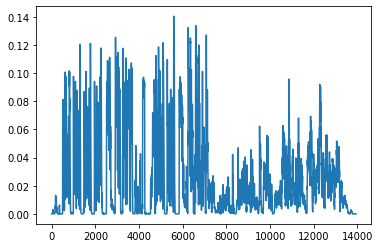

Creepoid_OldTree
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Creepoid_OldTree_MIX/vocals.wav
22050


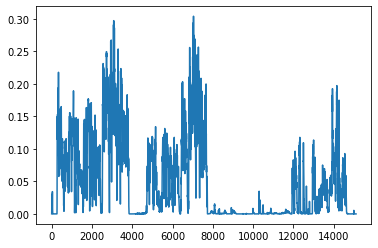

Handel_TornamiAVagheggiar
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Handel_TornamiAVagheggiar_MIX/vocals.wav
22050


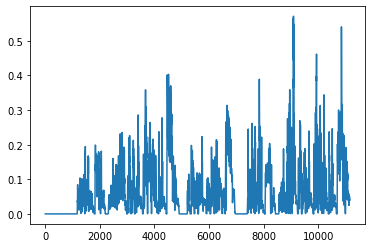

HopAlong_SisterCities
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HopAlong_SisterCities_MIX/vocals.wav
22050


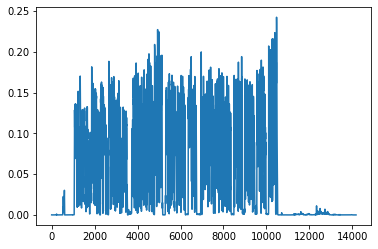

Mozart_BesterJungling
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Mozart_BesterJungling_MIX/vocals.wav
22050


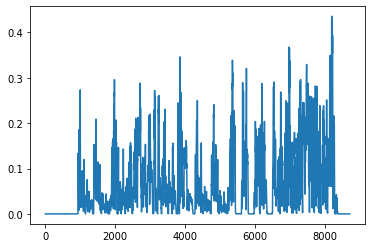

MusicDelta_Britpop
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Britpop_MIX/vocals.wav
22050


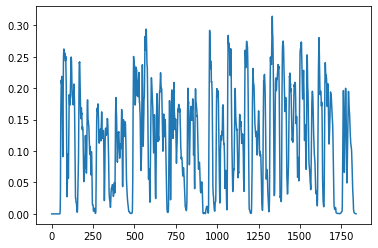

MusicDelta_Country2
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Country2_MIX/vocals.wav
22050


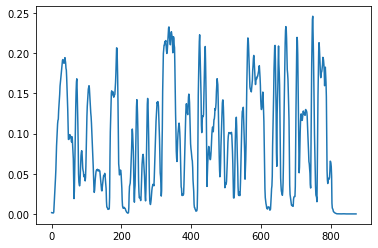

MusicDelta_Disco
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Disco_MIX/vocals.wav
22050


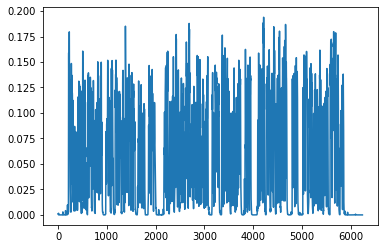

MusicDelta_Grunge
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Grunge_MIX/vocals.wav
22050


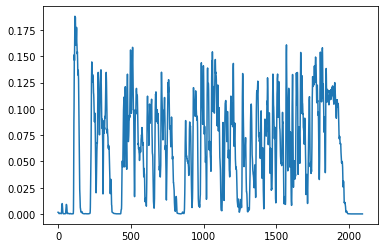

MusicDelta_Hendrix
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Hendrix_MIX/vocals.wav
22050


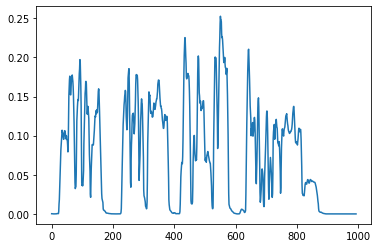

MusicDelta_Rock
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Rock_MIX/vocals.wav
22050


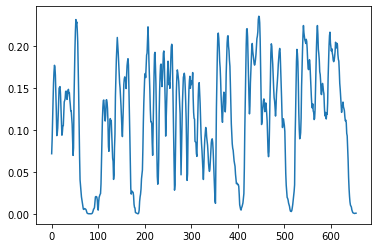

PurlingHiss_Lolita
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/PurlingHiss_Lolita_MIX/vocals.wav
22050


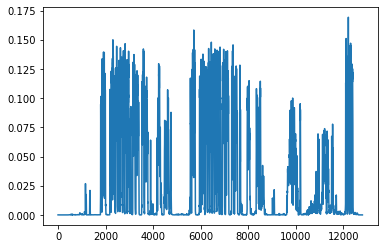

Schumann_Mignon
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Schumann_Mignon_MIX/vocals.wav
22050


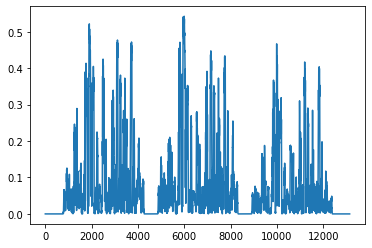

SecretMountains_HighHorse
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/SecretMountains_HighHorse_MIX/vocals.wav
22050


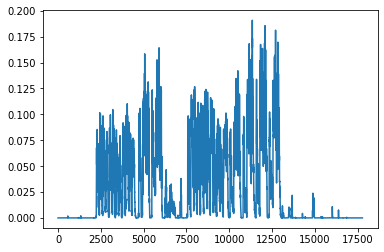

StrandOfOaks_Spacestation
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/StrandOfOaks_Spacestation_MIX/vocals.wav
22050


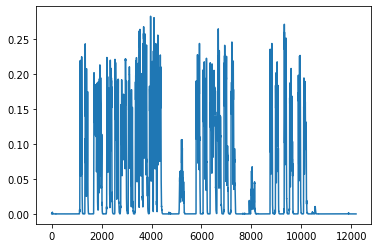

TheDistricts_Vermont
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheDistricts_Vermont_MIX/vocals.wav
22050


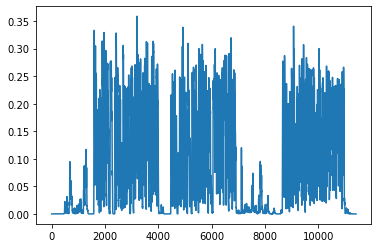

Wolf_DieBekherte
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Wolf_DieBekherte_MIX/vocals.wav
22050


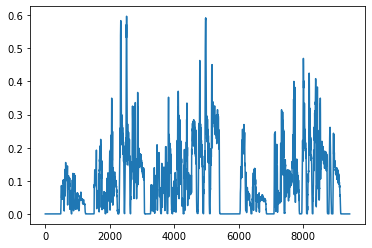

In [36]:
# Calculando apenas o primeiro split!
dict_rms = {}
for piece in train_files[0]+test_files[0]:
    print (piece)
    separated_vocals_path = path+piece+'_MIX/'+'vocals.wav'
    print (separated_vocals_path)
    y, sr = librosa.load(separated_vocals_path)
    print (sr)
    
    dict_rms[piece] = librosa.feature.rms(y=y, frame_length=2205, hop_length=441)
    plt.plot(dict_rms[piece][0])
    plt.show()

In [22]:
original_rms = dict_rms.copy()

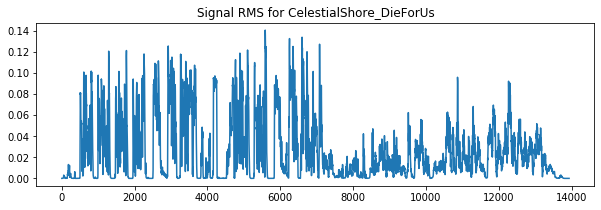

In [102]:
plt.figure(figsize=(10,3))
plt.title('Signal RMS for CelestialShore_DieForUs')
plt.plot(dict_rms['CelestialShore_DieForUs'][0])
plt.show()

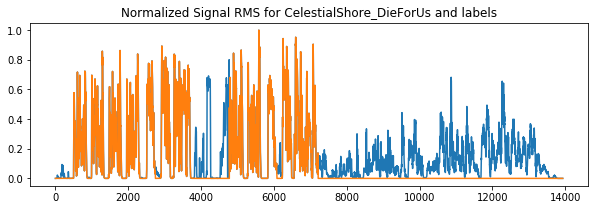

In [103]:
plt.figure(figsize=(10,3))
plt.title('Normalized Signal RMS for CelestialShore_DieForUs and labels')
plt.plot(dict_rms['CelestialShore_DieForUs'][0]/max(dict_rms['CelestialShore_DieForUs'][0]))
plt.plot(dict_lbl['CelestialShore_DieForUs']*dict_rms['CelestialShore_DieForUs'][0]/max(dict_rms['CelestialShore_DieForUs'][0]))
plt.show()

In [ ]:
# pular
dict_rms

In [7]:
# pular
rms = dict_rms['AimeeNorwich_Child']

In [ ]:
# pular
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
#librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
#                         y_axis='log', x_axis='time')
#plt.title('log Power spectrogram')
plt.tight_layout()

In [6]:
SPLITS

'split_train_test_10.json'

In [23]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])[0]

# Find optimal probability threshold
# threshold = Find_Optimal_Cutoff(y_train, X_train)
# print (threshold)

In [24]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score, accuracy_score
    
import numpy as np
from sklearn.metrics import precision_recall_fscore_support


In [39]:
labels_path = '/media/DISCO2TB/datasets/MedleyDB/Features/'

final_tsh = []
rows_list = []


for split in tqdm(range(10)):
    
    X_train, y_train = [], []
    X_test, y_test = [], []

    dict_lbl = {}
    for piece in train_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_train.append(dict_rms[piece][0].copy() - min(dict_rms[piece][0]) / max(dict_rms[piece][0]))
        y_train.append(dict_lbl[piece].copy())


    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    print (max(X_train),np.mean(X_train),min(X_train))

    print ('train', len(X_train), len(y_train))
   
    # Find the optimal threshold
    fpr, tpr, thresholds = roc_curve(y_train, X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, X_train)
    roc_auc = auc(fpr, tpr)

    # Threshold ótimo: specificity + sensibility - 1
    #tsh_optimal = max((1-fpr)+tpr-1)
    
    # Qual deles está correto????
    optimal_idx = np.argmax(abs(tpr - fpr))
    print ('sizes', len(tpr), len(fpr), len(thresholds))
    optimal_threshold = thresholds[optimal_idx]

    # Find optimal probability threshold
    #threshold = Find_Optimal_Cutoff(y_train, X_train)

    tsh_optimal = optimal_threshold
    print (tsh_optimal)
    
    final_tsh.append(tsh_optimal)
    
    
    # Evaluate test pieces
    for piece in test_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_test = dict_rms[piece][0].copy() - min(dict_rms[piece][0]) / max(dict_rms[piece][0])
        y_test = dict_lbl[piece].copy()
        
        y_true = y_test

        normalized = X_test
        normalized[normalized > tsh_optimal] = 1
        normalized[normalized <= tsh_optimal] = 0

        y_pred = normalized

        target_names = ['absent', 'present']
        #print(classification_report(y_true, y_pred, target_names=target_names))
    
        acc = accuracy_score(y_true, y_pred)
        P, R, F1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        rows_list.append({'split':split,
                          'piece':piece,
                          'threshold':tsh_optimal,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

0.48090294 0.049699515 -2.7469705e-05
train 442558 442558
sizes 62141 62141 388930
9.357745e-06
0.5967864 0.052037545 -0.0013651768
train 427587 427587
sizes 62407 62407 372560
1.1852018e-05
0.5967864 0.05785307 -0.0013651768
train 401668 401668
sizes 63600 63600 363932
1.2377246e-05
0.48090294 0.048073106 -0.0013651768
train 374465 374465
sizes 72051 72051 340987
1.51353215e-05
0.5967864 0.049279388 -2.8545564e-05
train 491966 491966
sizes 76668 76668 429220
1.2318244e-05
0.43468428 0.048226982 -0.0013651768
train 359478 359478
sizes 65050 65050 314880
2.1421174e-05
0.5967864 0.04518899 -0.0013651768
train 435508 435508
sizes 72584 72584 378072
3.068077e-05
0.5967864 0.049313154 -2.7469705e-05
train 471266 471266
sizes 82267 82267 414006
1.9856036e-05
0.36035475 0.049313545 -0.0013651768
train 377057 377057
sizes 62654 62654 334715
2.339972e-05
0.43468428 0.048487313 -0.0013651768
train 409200 409200
sizes 72268 72268 358058
3.4317374e-05



In [40]:
results_rf = pd.DataFrame(rows_list)

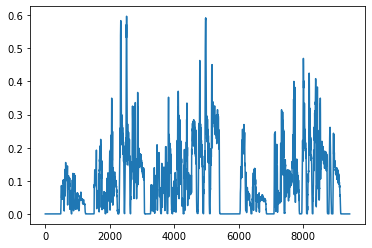

In [41]:
plt.plot(dict_rms[piece][0])

In [53]:
results_rf[results_rf.split == 8].head(80)

,split,piece,threshold,ACC,P,R,F1
151,8,AlexanderRoss_GoodbyeBolero,0.000023,0.935151,0.860924,0.993227,0.922356
152,8,AlexanderRoss_VelvetCurtain,0.000023,0.954908,0.947276,0.990468,0.968391
153,8,Creepoid_OldTree,0.000023,0.674211,0.641797,0.997045,0.780918
154,8,Debussy_LenfantProdigue,0.000023,0.960544,0.984447,0.969968,0.977154
155,8,Handel_TornamiAVagheggiar,0.000023,0.982602,0.979108,0.999778,0.989335
156,8,HeladoNegro_MitadDelMundo,0.000023,0.751237,0.743305,1.000000,0.852754
157,8,InvisibleFamiliars_DisturbingWildlife,0.000023,0.878738,0.904865,0.941776,0.922952
158,8,MatthewEntwistle_DontYouEver,0.000023,0.934397,0.905841,1.000000,0.950594
159,8,MatthewEntwistle_Lontano,0.000023,0.515235,0.449466,1.000000,0.620182
160,8,Mozart_BesterJungling,0.000023,0.950844,0.939761,1.000000,0.968945


In [54]:
results_rf = results_rf.sort_values(by='F1')

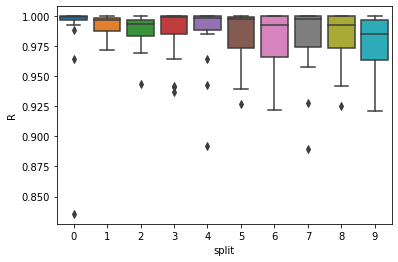

In [108]:
g = sns.boxplot(data=results_rf, y='R', x= 'split')

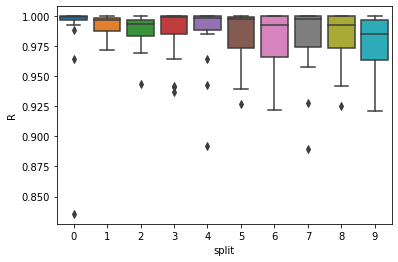

In [125]:
g = sns.boxplot(data=results_rf, y='R', x= 'split')


In [72]:
# # Para cada conjunto de teste, destacar o threshold e suas métricas
# for spl in results_rf.split.unique():
#     print (results_rf[results_rf['split']==spl]['threshold'][:1])
#     print()
#     display (results_rf[results_rf['split']==spl].describe())
#     print()

In [127]:
# Celestial Shore - Die For Us


In [130]:
df_melt

,threshold,metric,value
0,0.000009,ACC,0.375771
1,0.000012,ACC,0.380652
2,0.000009,P,0.350742
3,0.000012,P,0.352405
4,0.000009,R,0.993000
5,0.000012,R,0.991727
6,0.000009,F1,0.518383
7,0.000012,F1,0.520022


In [142]:
pieces_chosen = ['CelestialShore_DieForUs', 
                 'BigTroubles_Phantom', 
                 'PurlingHiss_Lolita',
                 'AlexanderRoss_GoodbyeBolero',
                 'Auctioneer_OurFutureFaces']

df_melt = pd.melt(results_rf[results_rf['piece'].isin(pieces_chosen)], 
                  id_vars=['threshold','piece'], 
                  value_vars=['ACC','P','R','F1'],
                  var_name='metric', value_name='value')

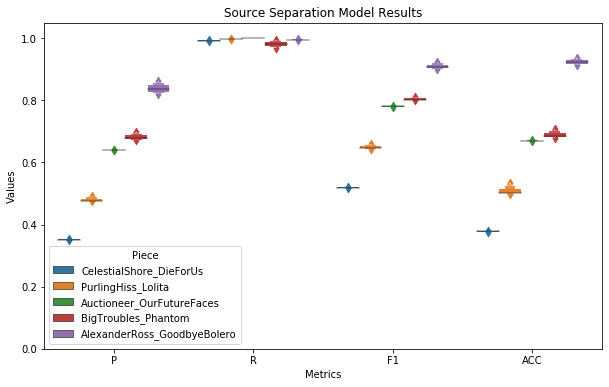

In [147]:
plt.figure(figsize=(10,6))
plt.title('Source Separation Model Results')
g = sns.boxenplot(data=df_melt,x='metric',y='value',order=['P','R','F1','ACC'],hue='piece')
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
plt.legend(title='Piece')
plt.show()

,split,piece,threshold,ACC,P,R,F1
1,0,CelestialShore_DieForUs,0.000009,0.375771,0.350742,0.993000,0.518383
38,2,CelestialShore_DieForUs,0.000012,0.380652,0.352405,0.991727,0.520022
25,1,MatthewEntwistle_Lontano,0.000012,0.500403,0.442021,1.000000,0.613057
159,8,MatthewEntwistle_Lontano,0.000023,0.515235,0.449466,1.000000,0.620182
12,0,PurlingHiss_Lolita,0.000009,0.498283,0.474697,0.997762,0.643325
...,...,...,...,...,...,...,...
177,9,Handel_TornamiAVagheggiar,0.000034,0.985024,0.982203,0.999556,0.990803
138,7,LizNelson_Coldwar,0.000020,0.987294,0.985380,0.999280,0.992281
102,5,LizNelson_Coldwar,0.000021,0.987882,0.986080,0.999280,0.992636
62,3,LizNelson_ImComingHome,0.000015,0.990874,0.990861,1.000000,0.995410


In [115]:
results_rf_mean = results_rf.groupby(['piece']).mean().reset_index()

In [116]:
results_rf_mean = results_rf_mean.sort_values(by='ACC')

[(0.0, 1.0)]

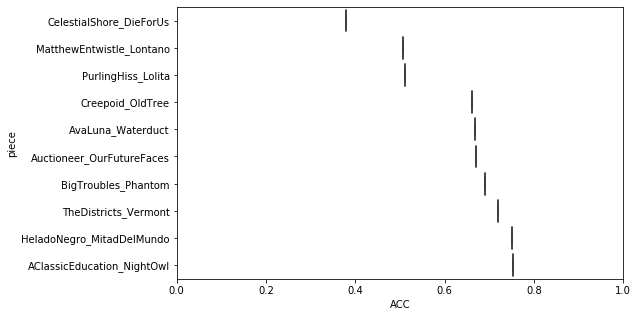

In [117]:
plt.figure(figsize=(8,5))
g= sns.boxplot(y='piece', x='ACC',  data=results_rf_mean.head(10))
g.set(xlim=(0.0,1.0))

[(0.0, 1.0)]

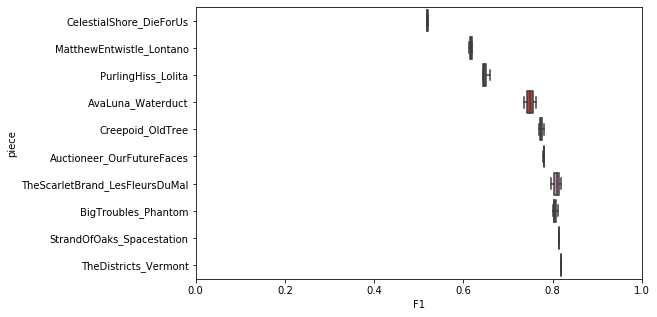

In [110]:
plt.figure(figsize=(8,5))
g= sns.boxplot(y='piece', x='F1',  data=results_rf.head(28))
g.set(xlim=(0.0,1.0))

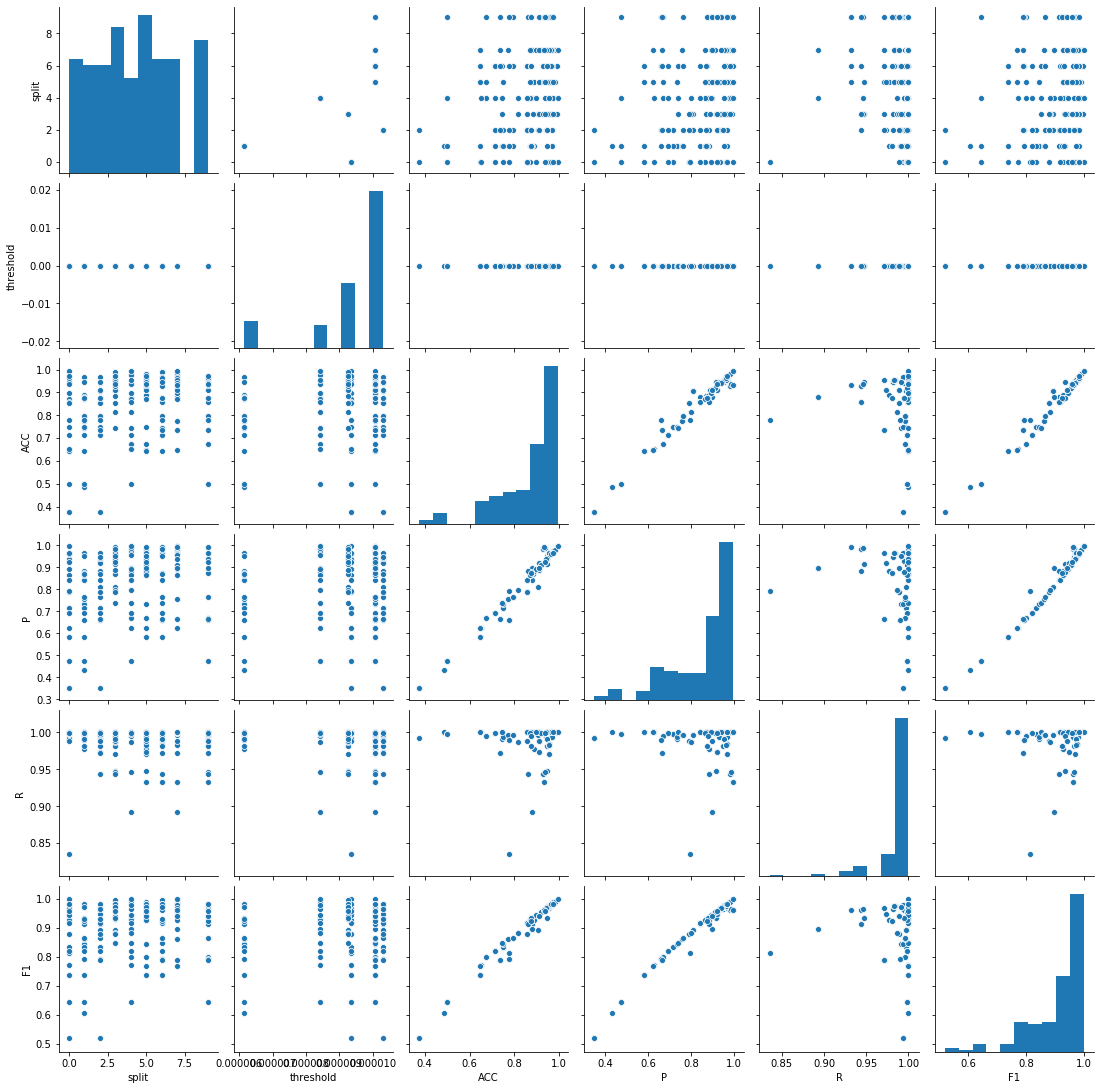

In [12]:
sns.pairplot(data=results_rf)

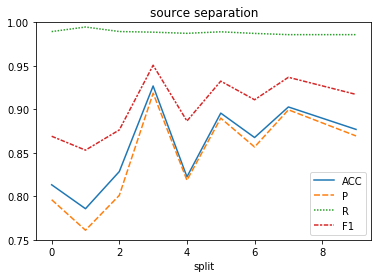

In [15]:
plt.title('source separation')
g = sns.lineplot(data=results_rf[['ACC','P','R','F1','split']].groupby('split').mean())
g.set(ylim=(0.75,1))
plt.show()

In [16]:
df_melt = pd.melt(results_rf, id_vars=['threshold'], value_vars=['ACC','P','R','F1'],var_name='metric', value_name='value')

No handles with labels found to put in legend.


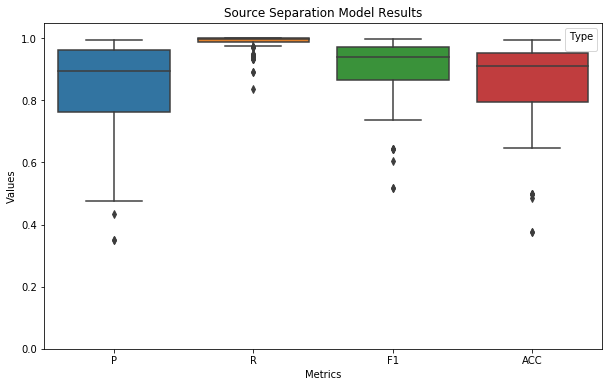

In [19]:
plt.figure(figsize=(10,6))
plt.title('Source Separation Model Results')
g = sns.boxplot(data=df_melt,x='metric',y='value',order=['P','R','F1','ACC'])
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
plt.legend(title='Type')
plt.show()

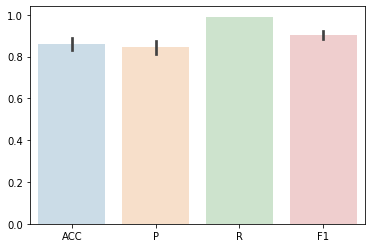

In [20]:
# Show each observation with a scatterplot
sns.barplot(
              data=results_rf[['ACC','P','R','F1','split']].groupby('split').mean(), dodge=True, alpha=.25, zorder=1)

In [13]:
# final_tsh = np.mean(final_tsh)
# final_tsh

# Mesma coisa que anteriormente, mas agora passando um filtro da mediana

In [12]:
labels_path = '/media/DISCO2TB/datasets/MedleyDB/Features/'

final_tsh = []
rows_list = []


for split in tqdm(range(10)):
    if split == 8:
        continue
    X_train, y_train = [], []
    X_test, y_test = [], []

    dict_lbl = {}
    for piece in train_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_train.append(medfilt(dict_rms[piece][0],51))
        y_train.append(dict_lbl[piece])


    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    print (max(X_train),np.mean(X_train),min(X_train))

    print ('train', len(X_train), len(y_train))
   
    # Find the optimal threshold
    fpr, tpr, thresholds = roc_curve(y_train, X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, X_train)
    roc_auc = auc(fpr, tpr)

    # Threshold ótimo: specificity + sensibility - 1
    #tsh_optimal = max((1-fpr)+tpr-1)
    
    # Qual deles está correto????
    optimal_idx = np.argmax(abs(tpr - fpr))
    print ('sizes', len(tpr), len(fpr), len(thresholds))
    optimal_threshold = thresholds[optimal_idx]

    # Find optimal probability threshold
    #threshold = Find_Optimal_Cutoff(y_train, X_train)

    tsh_optimal = optimal_threshold
    print (tsh_optimal)
    
    final_tsh.append(tsh_optimal)
    
    
    # Evaluate test pieces
    for piece in test_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_20ms.npy')
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_test = dict_rms[piece][0]
        y_test = dict_lbl[piece]
        
        y_true = y_test

        normalized = X_test
        normalized[normalized > tsh_optimal] = 1
        normalized[normalized <= tsh_optimal] = 0

        y_pred = normalized

        target_names = ['absent', 'present']
        #print(classification_report(y_true, y_pred, target_names=target_names))
    
        acc = accuracy_score(y_true, y_pred)
        P, R, F1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        rows_list.append({'split':split,
                          'piece':piece,
                          'threshold':tsh_optimal,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

0.3386200964450836 0.049049588206839724 0.0
train 442558 442558
sizes 97474 97474 193287
0.009796715341508389
1.0 0.18930524101749407 0.0
train 427587 427587
sizes 67879 67879 136055
0.012034242041409016
1.0 0.28209724918684187 0.0
train 401668 401668
sizes 51023 51023 102297
0.019157296046614647
1.0 0.39958928321398146 0.0
train 374465 374465
sizes 26410 26410 51005
0.016154902055859566
1.0 0.4626579016317494 0.0
train 491966 491966
sizes 21840 21840 43130
0.015113369561731815
1.0 0.5595412633559278 0.0
train 359478 359478
sizes 284 284 643
0.015363753773272038
1.0 0.5574863705572853 0.0
train 435508 435508
sizes 284 284 643
0.015363753773272038
1.0 0.5706453982860258 0.0
train 471266 471266
sizes 284 284 643
0.015363753773272038
1.0 0.568176378955675 0.0
train 409200 409200
sizes 284 284 643
0.015363753773272038



In [13]:
results_rf = pd.DataFrame(rows_list)

In [19]:
results_rf[results_rf.split == 2]

,split,piece,threshold,ACC,P,R,F1
35,2,AlexanderRoss_GoodbyeBolero,0.019157,0.907407,0.999838,0.761359,0.864453
36,2,AlexanderRoss_VelvetCurtain,0.019157,0.664606,0.998822,0.519677,0.683655
37,2,BrandonWebster_DontHearAThing,0.019157,0.743796,0.911346,0.778798,0.839875
38,2,CelestialShore_DieForUs,0.019157,0.627243,0.471195,0.832838,0.601870
39,2,HezekiahJones_BorrowedHeart,0.019157,0.677457,1.000000,0.608127,0.756317
40,2,HopAlong_SisterCities,0.019157,0.930073,0.994816,0.892266,0.940754
41,2,InvisibleFamiliars_DisturbingWildlife,0.019157,0.746411,0.973878,0.689672,0.807497
42,2,Meaxic_TakeAStep,0.019157,0.858022,0.945593,0.830756,0.884463
43,2,Meaxic_YouListen,0.019157,0.909236,1.000000,0.787256,0.880966
44,2,MusicDelta_80sRock,0.019157,0.866197,1.000000,0.853412,0.920909


In [15]:
import seaborn as sns

(-2, 11)

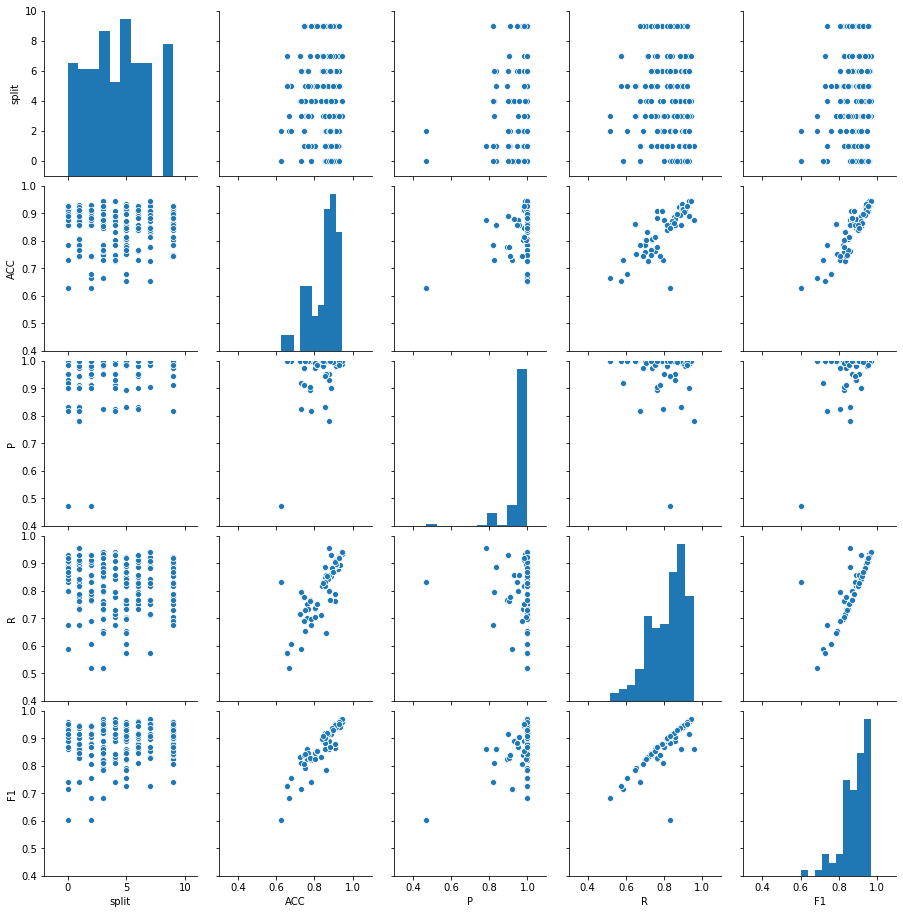

In [24]:
g = sns.pairplot(data=results_rf[['split','piece','ACC','P','R','F1']])
g.set(ylim=(0.4,1))
g.set(xlim=(0.3,1.1))
g.axes[0,0].set_ylim((-1,10))
g.axes[0,0].set_xlim((-2,11))

In [14]:
final_tsh

[9.351041e-06,
 6.142794e-06,
 1.0311902e-05,
 9.248293e-06,
 8.421104e-06,
 1.0059153e-05,
 1.0059153e-05,
 1.0059153e-05,
 1.0059153e-05]

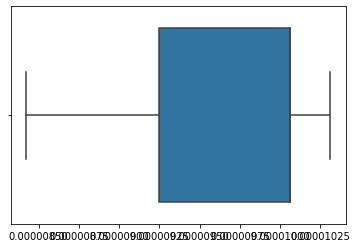

In [15]:
sns.boxplot(final_tsh, showfliers=False)

In [30]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [47]:
optimal_idx = np.argmax(tpr - (1-fpr))
optimal_threshold = thresholds[optimal_idx]

In [48]:
optimal_threshold

0.00022332784

NameError: name 'rms' is not defined

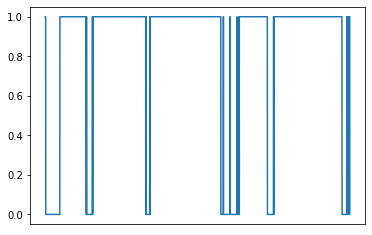

In [20]:
plt.plot(dict_rms[piece][0][:-1])
#plt.semilogy(dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(dict_rms[piece][0][:-1])
plt.semilogy(dict_lbl[piece]*dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(medfilt(dict_rms[piece][0][:-1],51))
plt.semilogy(dict_lbl[piece], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()

In [71]:
#Normalized Data
x = X_test
normalized = (x-min(x))/(1-min(x))

In [72]:
normalized

array([2.4438222e-04, 3.3414186e-04, 5.5110606e-04, ..., 1.0222070e-05,
       1.4475815e-05, 1.5191130e-05], dtype=float32)

In [73]:
max(normalized)

0.5967864

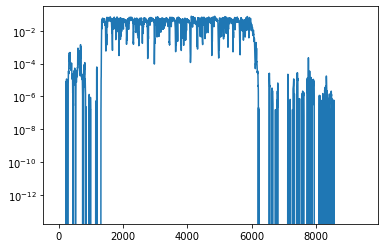

In [112]:
plt.plot(normalized)
plt.yscale('log')

In [42]:
len(y_test), len(X_test)

(18, 18)

In [109]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score

fpr, tpr, thresholds = roc_curve(y_train, X_train.T)
precision, recall, thresholds = precision_recall_curve(y_train, X_train.T)
roc_auc = auc(fpr, tpr)

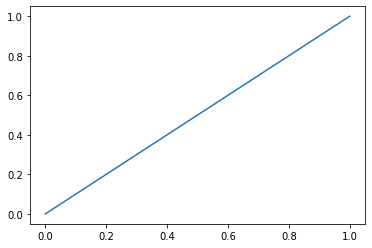

In [110]:
plt.plot(thresholds)

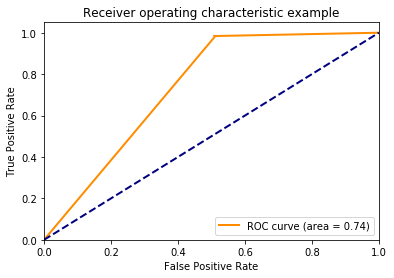

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
tpr

array([0.00000000e+00, 3.16429661e-06, 9.93589135e-04, ...,
       9.91456399e-01, 9.91462728e-01, 1.00000000e+00])

Logistic: f1=0.884 auc=0.980


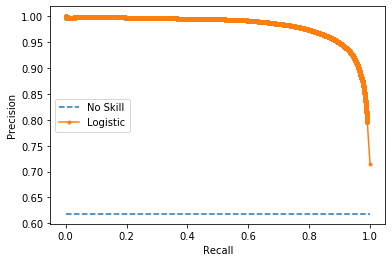

In [104]:
normalized = X_train.T
normalized[normalized > 10e-3] = 1
normalized[normalized <= 10e-3] = 0
lr_f1, lr_auc = f1_score(y_train, normalized), auc(recall, precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = sum(y_test) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [101]:
tsh_optimal = 10e-4

In [99]:
# Threshold ótimo: specificity + sensibility - 1
tsh_optimal = max((1-fpr)+tpr-1)
tsh_optimal

0.7786820043177243

In [105]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test

normalized = X_test
normalized[normalized > tsh_optimal] = 1
normalized[normalized <= tsh_optimal] = 0

y_pred = normalized
precision_recall_fscore_support(y_true, y_pred, average='macro')

precision_recall_fscore_support(y_true, y_pred, average='micro')

precision_recall_fscore_support(y_true, y_pred, average='weighted')


(0.14579913376338843, 0.3818365275394543, 0.21102226038705665, None)

In [106]:
from sklearn.metrics import classification_report
target_names = ['absent', 'present']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      absent       0.38      1.00      0.55     63197
     present       0.00      0.00      0.00    102311

    accuracy                           0.38    165508
   macro avg       0.19      0.50      0.28    165508
weighted avg       0.15      0.38      0.21    165508



In [96]:
X_test


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)